## Observations and Insights 

In [60]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
MouseResearch = pd.merge(mouse_metadata, study_results, how="outer", on='Mouse ID')

# Display the data table for preview
MouseResearch.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [61]:
# Get a list of all columns for easy reference
MouseResearch.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [62]:
# Assess merged database for correct datatypes
MouseResearch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [63]:
# Create a data frame to check the number of mice in the data base
MouseCount_df = MouseResearch

# Count the total number of mice in the database
TotalMouseCount = MouseCount_df["Mouse ID"].nunique()

# Print the total number of mice in the database
print(f"There are a total number of {TotalMouseCount} mice in Pymaceuticals Mouse Research database.")


There are a total number of 249 mice in Pymaceuticals Mouse Research database.


In [64]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
DuplicateMouse = MouseCount_df[MouseCount_df.duplicated(subset=["Mouse ID", "Timepoint"])]
print(DuplicateMouse)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [65]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
MouseDataClean_df = MouseCount_df[MouseCount_df["Mouse ID"]!="g989"]
print(MouseDataClean_df)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [66]:
# Checking the number of mice in the clean data frame
NewMouseCount = MouseDataClean_df["Mouse ID"].nunique()

# Print the number of mice in the clean data frame
print(f"There are a total number of {NewMouseCount} mice in Pymaceuticals Mouse Research database after the data has been cleared of duplicates.")


There are a total number of 248 mice in Pymaceuticals Mouse Research database after the data has been cleared of duplicates.


## Summary Statistics

In [67]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group the data by drug regimen
DrugRegimen_df = MouseDataClean_df.groupby('Drug Regimen')


# Calculate the mean for each drug
DrugMean = DrugRegimen_df['Tumor Volume (mm3)'].mean()

# Calculate the median for each drug
DrugMedian = DrugRegimen_df['Tumor Volume (mm3)'].median()

# Calculate the median for each drug
DrugVariance = DrugRegimen_df['Tumor Volume (mm3)'].var()

# Calculate the standard deviation for each drug
DrugStDev  = DrugRegimen_df['Tumor Volume (mm3)'].std()

# Calculate the Standard Error of Mean (SEM) for each drug
DrugSEM = DrugRegimen_df['Tumor Volume (mm3)'].sem()


# Summarize data in a data frame and display data frame in a table
GroupedDrugSummary_df = pd.DataFrame({'Mean': DrugMean,
    "Median": DrugMedian, "Variance": DrugVariance, 
    'Std Dev': DrugStDev, 'SEM': DrugSEM,})
GroupedDrugSummary_df.round(2)


,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [68]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
SummaryStats = MouseDataClean_df.groupby("Drug Regimen").agg(
    Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),
    Tumor_Vol_Median=('Tumor Volume (mm3)', np.median),
    Tumor_Vol_Variance=('Tumor Volume (mm3)', np.var),
    Tumor_Vol_StDev=('Tumor Volume (mm3)', np.std),
    Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem)
).round(2)

SummaryStats


,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Variance,Tumor_Vol_StDev,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

### Pandas Bar Chart

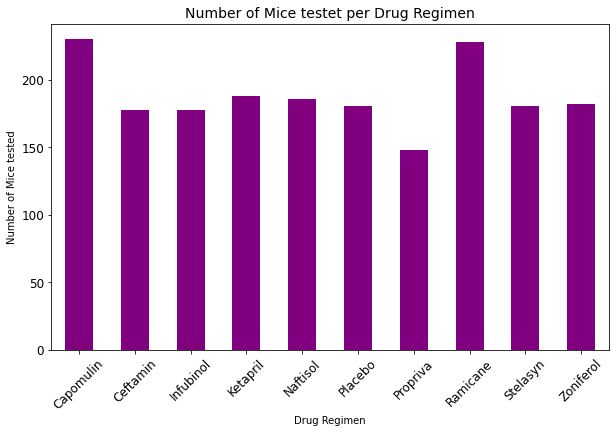

In [129]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Group Pandas data by drug regimen and count Mouse ID
BarChart = MouseDataClean_df.groupby('Drug Regimen').count()['Mouse ID']

# Plot Pandas data in bar chart
BarChart.plot.bar(figsize = (10,6), color = 'purple', fontsize = 12)

# Format Pandas Bar Chart
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice tested")
plt.xticks(rotation=45)
plt.title("Number of Mice testet per Drug Regimen", fontsize = 14)

# Save Pandas Bar Chart as png
plt.savefig("Charts_Plots/PandasBarChart.png")

# Display Pandas Bar Chart
plt.show()


### Matplotlip Bar Chart

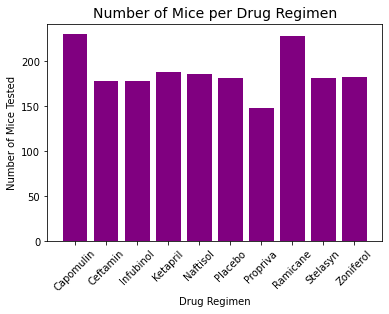

In [128]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Utilize 'BarChart' data frame from above convert into a list
BarChart.tolist()

# Set the x_axis for Matplotlip Bar Chart
x_axis = np.arange(len(BarChart))
x_axis = BarChart.index

# Create the Matplotlip Bar Chart
plt.bar(x_axis, BarChart, color = 'purple')

# Format the Matplotlip Bar Chart
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice per Drug Regimen", fontsize = 14)
plt.xticks(rotation=45)

# Save Matplotlip Bar Chart as png
plt.savefig("Charts_Plots/MatplotlipBarChart.png")

# Display Matplotlip Bar Chart
plt.show()



### Pandas Pie Chart

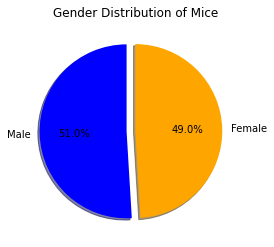

In [105]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Count male and female mice for Pandas Pie Chart
GenderDistribution = MouseDataClean_df['Sex'].value_counts()

# Define Pandas Pie Chart Values
sizes = GenderDistribution.values 
labels = GenderDistribution.values

# Plot Pandas Pie Chart 
GenderDistribution.plot(kind="pie", colors = ['blue', 'orange'], explode=(0.1,0), autopct="%1.1f%%", shadow=True, startangle=90)

# Format Pandas Pie Chart 
plt.title("Gender Distribution of Mice")
plt.ylabel(" ")

# Save Pandas Pie Chart as png
plt.savefig("Charts_Plots/PandasPieChart.png")

# Display Pandas Pie Chart
plt.show()


### Matplotlip Pie Chart

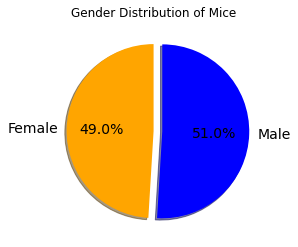

In [107]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Choose 'Sex' and 'Mouse ID' columns from clean data frame
Gernder_Distribition = MouseDataClean_df.loc[:,["Sex", "Mouse ID"]]

# Group the above columns by Sex
Gernder_Distribition = Gernder_Distribition.groupby(["Sex"]) 

# Determine percentage of gender distribution, plot and formate Matplotlip pie chart
Gernder_Distribition.count().unstack().plot.pie(figsize=(4,4),autopct="%1.1f%%", labels=['Female','Male'],
                                  title="Gender Distribution of Mice", fontsize=14, 
                                  shadow=True, explode=(0, 0.1), startangle=90, colors =["orange", "blue"]).set_ylabel('')


# Save Matplotlip Pie Chart as png
plt.savefig("Charts_Plots/MatplotlipPieChart.png")

# Display Matplotlip Pie Chart
plt.show()


## Quartiles, Outliers and Boxplots

In [113]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Filter Capomulin, Ramicane, Infubinol, and Ceftamin Treatment from Drug Regimens Column
TreatmentRegimens = MouseDataClean_df[MouseDataClean_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Find the last (greatest) timepoint for each mouse
GreatesTimePoint = TreatmentRegimens.groupby("Mouse ID").max()["Timepoint"]

# Display last greatest timepoint in table
GreatesTimePoint.reset_index().head()


,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45


In [114]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
TumorVolume = pd.merge(GreatesTimePoint, MouseDataClean_df, how="left", on=["Mouse ID", "Timepoint"])

# Display data frame in table
TumorVolume.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [127]:
# Put treatments into a list for for loop (and later for plot labels)
TreatmentList = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
TumorVolumeData = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Locate the rows which contain mice on each drug and get the tumor volumes
for Drug in TreatmentList:
    DrugTumorVolume = TumorVolume["Tumor Volume (mm3)"].loc[TumorVolume["Drug Regimen"] == Drug]
    
    # add subset 
    TumorVolumeData.append(DrugTumorVolume)
    
    # Determine outliers using upper and lower bounds
    Quartiles = DrugTumorVolume.quantile([.25,.5,.75])

    # Determine lower quartiles
    Lowerq = (Quartiles[0.25]).round() 

    # Determine upper quartiles
    Upperq = (Quartiles[0.75]).round()

    # Determine Interquartile Range (IQR)
    iqr = (Upperq - Lowerq).round()
    LowerBound = (Lowerq - (1.5*iqr))
    UpperBound = (Upperq + (1.5*iqr))

    # Print results
    print(f'{Drug}')
    print("-----------------------------------------------------------------")
    print(f'Interquartile Range (IQR): {iqr}.')
    print(f'Values below {LowerBound} are considered outliers.')
    print(f'Values above {UpperBound} are considered outliers.')
    print("-----------------------------------------------------------------\n ")
    

Capomulin
-----------------------------------------------------------------
Interquartile Range (IQR): 8.0.
Values below 20.0 are considered outliers.
Values above 52.0 are considered outliers.
-----------------------------------------------------------------
 
Ramicane
-----------------------------------------------------------------
Interquartile Range (IQR): 9.0.
Values below 18.5 are considered outliers.
Values above 54.5 are considered outliers.
-----------------------------------------------------------------
 
Infubinol
-----------------------------------------------------------------
Interquartile Range (IQR): 12.0.
Values below 36.0 are considered outliers.
Values above 84.0 are considered outliers.
-----------------------------------------------------------------
 
Ceftamin
-----------------------------------------------------------------
Interquartile Range (IQR): 15.0.
Values below 26.5 are considered outliers.
Values above 86.5 are considered outliers.
--------------------

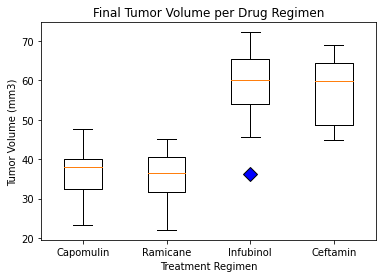

In [133]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Format the outliers 
diamond = dict(markerfacecolor='b', marker='D', markersize=10)

# Create box plot
fig, ax = plt.subplots()

# Formate box plot
ax.set_title('Final Tumor Volume per Drug Regimen')
ax.set_xticklabels(TreatmentList)
ax.set_xlabel('Treatment Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(TumorVolumeData, flierprops = diamond)

# Save Box Plot Chart as png
plt.savefig("Charts_Plots/BoxPlotChart.png")

# Display box plot
plt.show() 

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
